# 여성안심택배함 위치 (송파구, 동작구)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import requests

In [23]:
seoul_data = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 여성 안심 택배함(안심이) 설치 장소.csv', engine='python')
seoul_data

,자치구,안심 명,안심 주소,WGS x 좌표,WGS y 좌표
0,NaN,동양미래대학교 기숙사,고척동 76-11,37.499486,126.864981
1,NaN,성수2가3동공영주차장,광나루로 4가길 23,37.549125,127.055178
2,NaN,금하마을주민공동이용시설,금하로1다길 16,37.452986,126.891425
3,NaN,양재1동 민원분소,남부순환로 2610,37.484520,127.036130
4,NaN,신월1동 청소년독서실,남부순환로59길 8,37.532056,126.832253
...,...,...,...,...,...
253,강남구,대치4동 주민센터,도곡로77길 23,37.499730,127.057850
254,강남구,현대오일뱅크 신사현대점,서울특별시 강남구 도산대로 163,37.519340,127.026330
255,강남구,일원1동주민센터,양재대로55길 14,37.491855,127.088026
256,강남구,대치2동 주민센터,영동대로65길 24,37.502304,127.064188


In [24]:
# 송파, 동작만 뽑아 오기
songpa = seoul_data[seoul_data['자치구'] == '송파구']
dongjak = seoul_data[seoul_data['자치구'] == '동작구']

result = pd.concat([songpa,dongjak])

# 인덱스 재정렬
result = result.reset_index(drop=True)
result

,자치구,안심 명,안심 주소,WGS x 좌표,WGS y 좌표
0,송파구,거여2동주민센터,거마로2길 19,37.493539,127.146827
1,송파구,문정1동주민센터,동남로 116,37.490074,127.124181
2,송파구,여의도 순복음송파교회,마천로 17,37.510107,127.122966
3,송파구,마천2동주민센터,마천로 287,37.496842,127.148534
4,송파구,송파노인종합복지관,백제고분로32길 41,37.498668,127.094896
5,송파구,석촌동주민센터,백제고분로37길 16,37.503563,127.103684
6,송파구,송파여성 문화회관,백제고분로42길 5,37.505929,127.109731
7,송파구,송파여성 문화회관2,백제고분로42길 5,37.505929,127.109731
8,송파구,장지동 주민센터,새말로19길 6,37.486966,127.132438
9,송파구,거여1동주민센터,오금로53길 32,37.496940,127.143304


In [25]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
result_x = result['WGS x 좌표']
result_y = result['WGS y 좌표']

lat = result['WGS x 좌표'].mean()
long = result['WGS y 좌표'].mean()

m = folium.Map([lat, long], zoom_start = 12, tiles='cartodbpositron')

coords = []
for i in range(len(result)-1):
    x = result_x[i]
    y = result_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#ED9253',
        fill = 'crimson',
    ).add_to(m)

#m.save('C:/Users/byk11/Downloads/seoul_map.html')
m


# CCTV 위치(송파구, 동작구)

In [26]:
seoul_CCTV_data = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 (안심이) CCTV 설치 현황.csv', engine='python')
seoul_CCTV_data

,자치구,안심 주소,CCTV 용도,WGS x좌표,WGS y좌표,CCTV 수량,수정 일시
0,중랑구,서울특별시 중랑구 중화동 중랑역로15길 22,방범,37.597702,127.074799,3,2021-01-12
1,중랑구,서울특별시 중랑구 망우동 망우로58길 55 월드아파트,방범,37.595980,127.094987,4,2021-01-12
2,중랑구,서울특별시 중랑구 상봉동 동일로120길 79,방범,37.597652,127.084450,1,2021-01-12
3,중랑구,서울특별시 중랑구 중화동 중랑역로 16,방범,37.596809,127.076378,1,2021-01-12
4,중랑구,서울특별시 중랑구 신내동 봉화산로 238,방범,37.607410,127.099586,4,2021-01-12
...,...,...,...,...,...,...,...
37710,강남구,서울특별시 강남구 압구정동 압구정로39길 58 구현대아파트,방범,37.532734,127.032384,3,2021-02-01
37711,강남구,서울특별시 강남구 신사동 강남대로158길 13,방범,37.519567,127.020364,5,2021-02-01
37712,강남구,[압구정-285] (4) 압구정동 압구정동480_1,방범,37.531840,127.034790,3,2021-02-01
37713,강남구,서울특별시 강남구 논현동 봉은사로21길 49,방범,37.509780,127.028960,1,2021-02-01


In [27]:
songpa_CCTV = seoul_CCTV_data[seoul_CCTV_data['자치구'] == '송파구']
dongjak_CCTV = seoul_CCTV_data[seoul_CCTV_data['자치구'] == '동작구']
CCTV_result = pd.concat([songpa_CCTV,dongjak_CCTV])
CCTV_result

# 인덱스 재정렬
CCTV_result = CCTV_result.reset_index(drop=True)
CCTV_result

,자치구,안심 주소,CCTV 용도,WGS x좌표,WGS y좌표,CCTV 수량,수정 일시
0,송파구,서울특별시 송파구 장지동 위례순환로 429 송례중학교,NaN,37.478458,127.139145,3,2021-01-12
1,송파구,장지동 393,NaN,37.478470,127.142044,5,2021-01-12
2,송파구,서울특별시 송파구 장지동 위례광장로 163 위례22단지,NaN,37.479990,127.141680,4,2021-01-12
3,송파구,서울특별시 송파구 문정동 송파대로 106,NaN,37.480915,127.126656,1,2021-01-12
4,송파구,서울특별시 송파구 장지동 충민로6길 10 버들어린이집,NaN,37.481480,127.131393,1,2021-01-12
...,...,...,...,...,...,...,...
1926,동작구,서울특별시 동작구 대방동 등용로 75 트라움빌,어린이안전,37.508469,126.932714,1,2021-01-20
1927,동작구,서울특별시 동작구 신대방동 대림로 37,방범,37.487625,126.908275,3,2021-01-20
1928,동작구,서울특별시 동작구 노량진동 만양로3길 48 유치원,어린이안전,37.508400,126.943794,3,2021-01-20
1929,동작구,서울특별시 동작구 흑석동 서달로 167,어린이안전,37.508026,126.962890,3,2021-01-20


In [28]:
# 결측치 확인
CCTV_result.isnull().sum()

자치구          0
안심 주소        0
CCTV 용도    119
WGS x좌표      1
WGS y좌표      1
CCTV 수량      0
수정 일시        0
dtype: int64

In [29]:
# 결측치 제거
CCTV_result = CCTV_result.dropna(subset=['WGS x좌표', 'WGS y좌표'])
CCTV_result.isnull().sum()
# 인덱스 재정렬
CCTV_result = CCTV_result.reset_index(drop=True)

CCTV_result

,자치구,안심 주소,CCTV 용도,WGS x좌표,WGS y좌표,CCTV 수량,수정 일시
0,송파구,서울특별시 송파구 장지동 위례순환로 429 송례중학교,NaN,37.478458,127.139145,3,2021-01-12
1,송파구,장지동 393,NaN,37.478470,127.142044,5,2021-01-12
2,송파구,서울특별시 송파구 장지동 위례광장로 163 위례22단지,NaN,37.479990,127.141680,4,2021-01-12
3,송파구,서울특별시 송파구 문정동 송파대로 106,NaN,37.480915,127.126656,1,2021-01-12
4,송파구,서울특별시 송파구 장지동 충민로6길 10 버들어린이집,NaN,37.481480,127.131393,1,2021-01-12
...,...,...,...,...,...,...,...
1925,동작구,서울특별시 동작구 대방동 등용로 75 트라움빌,어린이안전,37.508469,126.932714,1,2021-01-20
1926,동작구,서울특별시 동작구 신대방동 대림로 37,방범,37.487625,126.908275,3,2021-01-20
1927,동작구,서울특별시 동작구 노량진동 만양로3길 48 유치원,어린이안전,37.508400,126.943794,3,2021-01-20
1928,동작구,서울특별시 동작구 흑석동 서달로 167,어린이안전,37.508026,126.962890,3,2021-01-20


In [36]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
result_x = result['WGS x 좌표']
result_y = result['WGS y 좌표']

CCTV_result_x = CCTV_result['WGS x좌표']
CCTV_result_y = CCTV_result['WGS y좌표']

lat = CCTV_result['WGS x좌표'].mean()
long = CCTV_result['WGS y좌표'].mean()

m = folium.Map([lat, long], zoom_start = 12, tiles='cartodbpositron')

coords = []
coords2 = []

#CCTV 
for i in range(len(CCTV_result)-1):
    x = CCTV_result_x[i]
    y = CCTV_result_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = 'blue',
        fill = 'crimson',
    ).add_to(m)

# 안심택배함 시각화
for i in range(len(result)-1):
    x2 = result_x[i]
    y2 = result_y[i]
    coords2.append([x2, y2])
    
for i in range(len(coords2)):
    folium.Circle(
        location = coords2[i],
        radius = 50,
        color = '#ED9253',
        fill = 'crimson',
    ).add_to(m)
    
#m.save('C:/Users/byk11/Downloads/seoul_map.html')
m


# 동작구 공공와이파이

In [6]:
dongjak_wifi = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구 공공와이파이 서비스 위치 정보.csv', engine='python')
dongjak_wifi

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자
0,ARI00133,동작구,남부수도사업소,동작구 여의대방로10길 97,본관 1F,1,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.91500,37.492393,2021-10-06 10:57:44.0
1,ARI00134,동작구,남부수도사업소,동작구 여의대방로10길 97,본관 1F,1,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.91500,37.492393,2021-10-06 10:57:44.0
2,ARI00135,동작구,남부수도사업소,동작구 여의대방로10길 97,본관 1F,1,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.91500,37.492393,2021-10-06 10:57:44.0
3,ARI00136,동작구,남부수도사업소,동작구 여의대방로10길 97,본관 1F,1,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.91500,37.492393,2021-10-06 10:57:44.0
4,ARI00137,동작구,남부수도사업소,동작구 여의대방로10길 97,본관 2F,2,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.91500,37.492393,2021-10-06 10:57:44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,WF210001,동작구,남부장애인종합복지관,여의대방로 20나길 40,1F 정보화센터 앞 복도,NaN,6-1. 복지 - 사회,서울시(AP),공공WiFi,임대망,2021,실내,NaN,126.91688,37.490253,2021-10-06 10:57:51.0
244,WF210004,동작구,남부장애인종합복지관,여의대방로 20나길 40,2F 통합사무실 앞 복도,NaN,6-1. 복지 - 사회,서울시(AP),공공WiFi,임대망,2021,실내,NaN,126.91688,37.490253,2021-10-06 10:57:51.0
245,WF210005,동작구,남부장애인종합복지관,여의대방로 20나길 40,2F 프로그램실 앞 복도,NaN,6-1. 복지 - 사회,서울시(AP),공공WiFi,임대망,2021,실내,NaN,126.91688,37.490253,2021-10-06 10:57:51.0
246,WF210006,동작구,남부장애인종합복지관,여의대방로 20나길 40,1F 성인물리치료실 앞 복도,NaN,6-1. 복지 - 사회,서울시(AP),공공WiFi,임대망,2021,실내,NaN,126.91688,37.490253,2021-10-06 10:57:51.0


In [4]:
# 결측치 확인
dongjak_wifi.isnull().sum()

관리번호          0
자치구           0
와이파이명         0
도로명주소         0
상세주소          0
설치위치(층)     169
설치유형          0
설치기관          0
서비스구분         0
망종류           0
설치년도          0
실내외구분         0
wifi접속환경    248
X좌표           0
Y좌표           0
작업일자          0
dtype: int64

In [14]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
wifi_result_x = dongjak_wifi['Y좌표']
wifi_result_y = dongjak_wifi['X좌표']

lat = wifi_result_x.mean()
long = wifi_result_y.mean()

m = folium.Map([lat, long], zoom_start = 12, tiles='cartodbpositron')

coords = []
for i in range(len(dongjak_wifi)-1):
    x = wifi_result_x[i]
    y = wifi_result_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = 'skyblue',
        fill = 'crimson',
    ).add_to(m)

#m.save('C:/Users/byk11/Downloads/seoul_map.html')
m


# 동작구 안심택배함 이용현황(2021.6-7월)

In [56]:
seoul_data1 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202101.csv', engine='python', encoding='utf-8')
seoul_data2 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202102.csv', engine='python', encoding='utf-8')
seoul_data3 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202103.csv', engine='python', encoding='utf-8')
seoul_data4 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202104.csv', engine='python', encoding='utf-8')

#
seoul_data5 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202105.csv', engine='python', encoding='utf-8')
seoul_data5

,구명,시설명,칸수,04월 점유수,05월 점유수,05월 점유율,04월 찾은 건 수,05월 찾은 건 수,05월 일 평균
0,동작구,순만빌딩,19,190,203,34%,143,139,24%
1,동작구,사당문화회관,19,284,295,50%,169,187,32%
2,동작구,상도1동주민센터,19,228,251,43%,154,168,29%
3,동작구,예그리나주택,19,67,71,12%,61,58,10%
4,동작구,강남교회 교육관,19,153,179,30%,117,132,22%
5,동작구,동작 청소년문화의 집,19,71,64,11%,50,46,8%
6,동작구,우리은행 동작구청지점,47,746,783,54%,603,558,38%
7,동작구,사당노인종합복지관,19,437,283,48%,139,119,20%
8,동작구,동작문화 복지센터,26,1,0,0%,1,0,0%
9,동작구,상도3동 주민센터,33,733,546,53%,417,388,38%


In [41]:
seoul_data6 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_202106.csv', engine='python', encoding='utf-8')
seoul_data6

,구명,시설명,칸수,05월 점유수,06월 점유수,06월 점유율,05월 찾은 건 수,06월 찾은 건 수,06월 일 평균
0,동작구,순만빌딩,19,203,268,47%,139,133,23%
1,동작구,사당문화회관,19,295,234,41%,187,171,30%
2,동작구,상도1동주민센터,19,251,339,59%,168,101,18%
3,동작구,예그리나주택,19,71,58,10%,58,51,9%
4,동작구,강남교회 교육관,19,179,308,54%,132,134,24%
5,동작구,동작 청소년문화의 집,19,64,127,22%,46,74,13%
6,동작구,우리은행 동작구청지점,47,783,1121,80%,558,587,42%
7,동작구,사당노인종합복지관,19,283,231,41%,119,106,19%
8,동작구,동작문화 복지센터,26,0,0,0%,0,0,0%
9,동작구,상도3동 주민센터,33,546,614,62%,388,456,46%


In [42]:
seoul_data7 = pd.read_csv('C:/Users/byk11/Downloads/서울특별시 동작구_여성안심택배함 연간 이용 현황_20210728.csv', engine='python', encoding='utf-8')
seoul_data7.isnull().sum()
seoul_data7 = seoul_data7.dropna()
seoul_data7 = seoul_data7.replace('동작문화 복지센터_신품', '동작문화 복지센터')
seoul_data7

,구명,시설명,칸수,06월 점유수,07월 점유수,07월점유율,전월대비,06월 찾은 건 수,07월 찾은 건 수,07월 일 평균,전월 대비
0,동작구,상도3동 주민센터,25.0,730.0,652.0,87%,89%,462.0,427.0,57%,92%
1,동작구,동작문화 복지센터,25.0,525.0,498.0,66%,95%,379.0,326.0,43%,86%
2,동작구,사당노인종합복지관,19.0,330.0,317.0,56%,96%,202.0,204.0,36%,101%
3,동작구,우리은행 동작구청지점,43.0,1426.0,1488.0,115%,104%,936.0,958.0,74%,102%
5,동작구,동작 청소년문화의 집,20.0,257.0,252.0,42%,98%,156.0,169.0,28%,108%
6,동작구,강남교회 교육관,20.0,340.0,312.0,52%,92%,236.0,221.0,37%,94%
7,동작구,예그리나주택,19.0,317.0,311.0,55%,98%,233.0,212.0,37%,91%
8,동작구,상도1동주민센터,16.0,391.0,270.0,56%,69%,154.0,172.0,36%,112%
9,동작구,사당문화회관,16.0,426.0,367.0,76%,86%,228.0,223.0,46%,98%
10,동작구,순만빌딩,13.0,301.0,357.0,92%,119%,167.0,224.0,57%,134%


## 동작구 시설 별 칸수(2021.7)

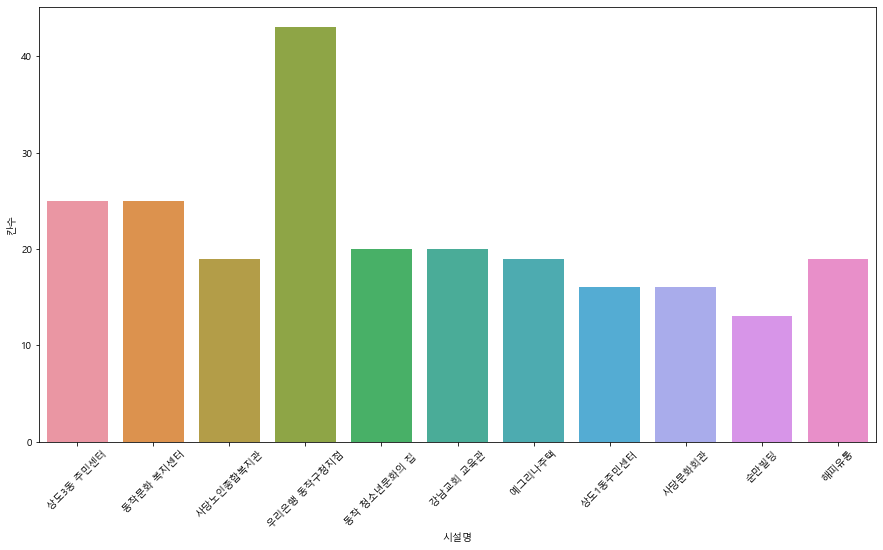

In [43]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45 )
sns.barplot(data=seoul_data7, x="시설명", y="칸수")

## 전월대비 점유율

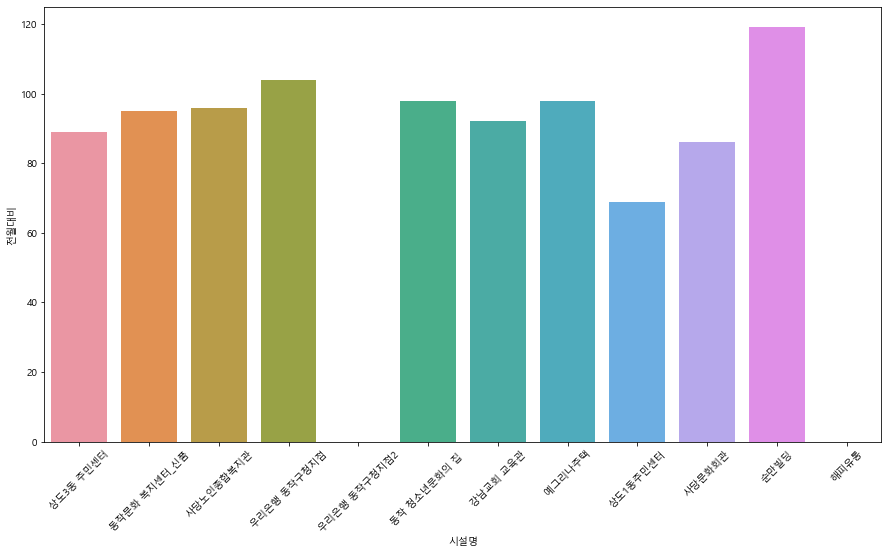

In [44]:
seoul_data7['전월대비'] = seoul_data7['전월대비'].replace(r'%', '', regex=True)
pd.to_numeric(seoul_data7.전월대비)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45 )
sns.barplot(data=seoul_data7, x="시설명", y="전월대비")

## 5,6,7월 칸수 비교

In [47]:
seoul_data5[['시설명', '칸수']]

,시설명,칸수
0,순만빌딩,19
1,사당문화회관,19
2,상도1동주민센터,19
3,예그리나주택,19
4,강남교회 교육관,19
5,동작 청소년문화의 집,19
6,우리은행 동작구청지점,47
7,사당노인종합복지관,19
8,동작문화 복지센터,26
9,상도3동 주민센터,33


In [50]:
dongjak_67 = pd.merge(seoul_data6[['시설명', '칸수']], seoul_data7[['시설명', '칸수']], on = '시설명', how = 'left')
dongjak_67.columns=['시설명','6월칸수', '7월칸수']

dongjak_67

,시설명,6월칸수,7월칸수
0,순만빌딩,19,13.0
1,사당문화회관,19,16.0
2,상도1동주민센터,19,16.0
3,예그리나주택,19,19.0
4,강남교회 교육관,19,20.0
5,동작 청소년문화의 집,19,20.0
6,우리은행 동작구청지점,47,43.0
7,사당노인종합복지관,19,19.0
8,동작문화 복지센터,26,25.0
9,상도3동 주민센터,33,25.0


In [54]:
dongjak_567 = pd.merge(seoul_data5[['시설명', '칸수']], dongjak_67, on = '시설명', how = 'left')
dongjak_567.columns=['시설명','5월칸수', '6월칸수', '7월칸수']

dongjak_567

,시설명,5월칸수,6월칸수,7월칸수
0,순만빌딩,19,19,13.0
1,사당문화회관,19,19,16.0
2,상도1동주민센터,19,19,16.0
3,예그리나주택,19,19,19.0
4,강남교회 교육관,19,19,20.0
5,동작 청소년문화의 집,19,19,20.0
6,우리은행 동작구청지점,47,47,43.0
7,사당노인종합복지관,19,19,19.0
8,동작문화 복지센터,26,26,25.0
9,상도3동 주민센터,33,33,25.0


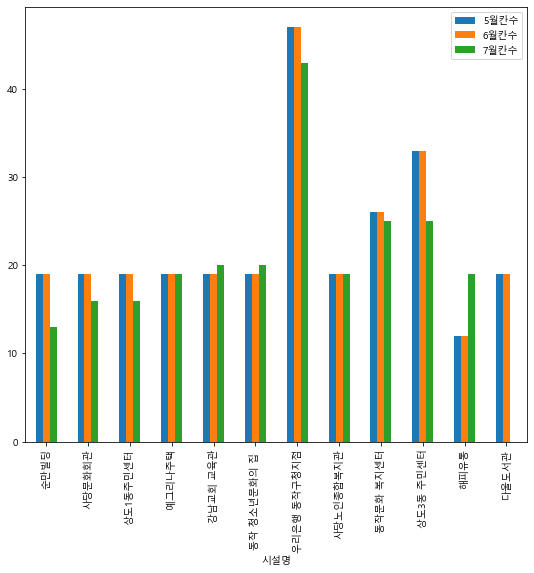

In [55]:
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.figure(figsize=(15,8))
#plt.xticks(rotation = 45 )
#sns.barplot(data=dongjak_67, x="시설명", y=[['6월칸수','7월칸수']])

dongjak_567.plot(x="시설명", y=['5월칸수', '6월칸수','7월칸수'], kind="bar",figsize=(9,8))
